# Compare the 2022 viscosity model from Büyükurganci et al. with the 2017 model from Herold
Use the averaged values to describe the temperature dependence. See notebook `20230117_mc_viscosity_calculations.ipynb`.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style('darkgrid')
# sns.set_context('talk')

Compute the averaged values for $\alpha$ and $\lambda$

In [2]:
alpha = [0.0022, 0.0024, 0.0021]
alpha_mean = np.mean(alpha)
alhpa_sd = np.std(alpha)
alpha_sem = alhpa_sd / np.sqrt(len(alpha))
alpha_err_mean = np.mean([0.0004, 0.0003, 0.0004])

lambdas = [3691.8, 3095.6, 3351.6]
lambda_mean = np.mean(lambdas)
lambda_sd = np.std(lambdas)
lambda_sem = lambda_sd / np.sqrt(len(lambdas))
lambda_err_mean = np.mean([475.2, 242.5, 412.4])

print("Mean +/- SEM +/- error propagation")
print("alpha = {:.5f} +/- {:.5f} +/- {:.5f}".format(alpha_mean, alpha_sem, alpha_err_mean))
print("lambda = {:.1f} +/- {:.1f} +/- {:.1f}".format(lambda_mean, lambda_sem, lambda_err_mean))

Mean +/- SEM +/- error propagation
alpha = 0.00223 +/- 0.00007 +/- 0.00037
lambda = 3379.7 +/- 141.0 +/- 376.7


In [3]:
def shear_rate_square_channel(flow_rate, channel_size, flow_index):
    """Returns shear rate in 1/s. Flow rate in ul/s, channel size in um, temperature in Celsius."""
    # convert channel size to mm
    channel_size = channel_size / 1000
    return 8*flow_rate/(channel_size**3) * (0.6671 + 0.2121/flow_index)

def viscosity_mc05_bb(flow_rate, channel_size, temperature):
    """Returns viscosity in Pa s. Flow rate in ul/s, channel size in um, temperature in Celsius."""
    t_kelvin = temperature + 273.15
    n = alpha_mean * t_kelvin - 0.0056
    k = 2.3e-6 * np.exp(lambda_mean / t_kelvin)
    shear_rate = shear_rate_square_channel(flow_rate, channel_size, n)
    return k * shear_rate**(n-1)

def viscosity_mc06_bb(flow_rate, channel_size, temperature):
    """Returns viscosity in Pa s. Flow rate in ul/s, channel size in um, temperature in Celsius."""
    t_kelvin = temperature + 273.15
    n = alpha_mean * t_kelvin - 0.0744
    k = 5.7e-6 * np.exp(lambda_mean / t_kelvin)
    shear_rate = shear_rate_square_channel(flow_rate, channel_size, n)
    return k * shear_rate**(n-1)

def viscosity_mc05_herold(flow_rate, channel_size, temperature):
    """Returns viscosity in Pa s. Flow rate in ul/s, channel size in um, temperature in Celsius."""
    n = 0.677
    shear_rate = shear_rate_square_channel(flow_rate, channel_size, n)
    return 0.179 * shear_rate**(n-1) * (temperature/23.2)**(-0.866)

def viscosity_mc06_herold(flow_rate, channel_size, temperature):
    """Returns viscosity in Pa s. Flow rate in ul/s, channel size in um, temperature in Celsius."""
    n = 0.634
    shear_rate = shear_rate_square_channel(flow_rate, channel_size, n)
    return 0.36 * shear_rate**(n-1) * (temperature/23.6)**(-0.866)

def get_dataframe(channel_size, flow_rates, temperatures):
    df_channel = pd.DataFrame()
    for fr in flow_rates:
        df_fr = pd.DataFrame()
        for tt in temperatures:
            df_tt = pd.DataFrame()
            df = pd.DataFrame()
            df['Viscosity [mPa s]'] = [1000 * viscosity_mc05_bb(fr,
                                                                channel_size,
                                                                tt)]
            df['MC concentration'] = "0.5 %"
            df['Buffer'] = "0.49% MC-PBS"
            df['Viscosity model'] = "Büyükurganci 2022"
            df_tt = pd.concat([df_tt, df])

            df = pd.DataFrame()
            df['Viscosity [mPa s]'] = [1000 * viscosity_mc05_herold(fr,
                                                                    channel_size,
                                                                    tt)]
            df['MC concentration'] = "0.5 %"
            df['Buffer'] = "0.49% MC-PBS"
            df['Viscosity model'] = "Herold 2017"
            df_tt = pd.concat([df_tt, df])

            df = pd.DataFrame()
            df['Viscosity [mPa s]'] = [1000 * viscosity_mc06_bb(fr,
                                                                channel_size,
                                                                tt)]
            df['MC concentration'] = "0.6 %"
            df['Buffer'] = "0.59% MC-PBS"
            df['Viscosity model'] = "Büyükurganci 2022"
            df_tt = pd.concat([df_tt, df])

            df = pd.DataFrame()
            df['Viscosity [mPa s]'] = [1000 * viscosity_mc06_herold(fr,
                                                                    channel_size,
                                                                    tt)]
            df['MC concentration'] = "0.6 %"
            df['Buffer'] = "0.59% MC-PBS"
            df['Viscosity model'] = "Herold 2017"
            df_tt = pd.concat([df_tt, df])

            df_tt['Temperature [°C]'] = tt
            df_fr = pd.concat([df_fr, df_tt])

        df_fr['Flow rate [µl/s]'] = fr
        df_channel = pd.concat([df_channel, df_fr])

    df_channel.reset_index(inplace=True)
    return df_channel

## 20 µm

In [4]:
channel_size = 20
flow_rates = np.round(np.linspace(0.02, 0.12, 6), 2)
temperatures = np.arange(19, 38, 3)

df_20um = get_dataframe(channel_size, flow_rates, temperatures)

In [5]:
df_20um

index  Viscosity [mPa s] MC concentration        Buffer  \
0        0           7.373936            0.5 %  0.49% MC-PBS   
1        0           8.739970            0.5 %  0.49% MC-PBS   
2        0           9.099889            0.6 %  0.59% MC-PBS   
3        0          11.571931            0.6 %  0.59% MC-PBS   
4        0           7.013663            0.5 %  0.49% MC-PBS   
..     ...                ...              ...           ...   
163      0           3.628627            0.6 %  0.59% MC-PBS   
164      0           3.221618            0.5 %  0.49% MC-PBS   
165      0           2.751091            0.5 %  0.49% MC-PBS   
166      0           3.529957            0.6 %  0.59% MC-PBS   
167      0           3.372410            0.6 %  0.59% MC-PBS   

       Viscosity model  Temperature [°C]  Flow rate [µl/s]  
0    Büyükurganci 2022                19              0.02  
1          Herold 2017                19              0.02  
2    Büyükurganci 2022                19              0.02  
3          Herold 2017                19              0.02  
4    Büyükurganci 2022                22              0.02  
..                 ...               ...               ...  
163        Herold 2017                34              0.12  
164  Büyükurganci 2022                37              0.12  
165        Herold 2017                37              0.12  
166  Büyükurganci 2022                37              0.12  
167        Herold 2017                37              0.12  

[168 rows x 7 columns]

In [6]:
# makes fonts even bigger to be visible in final figure
sns.set(font_scale=1.75)

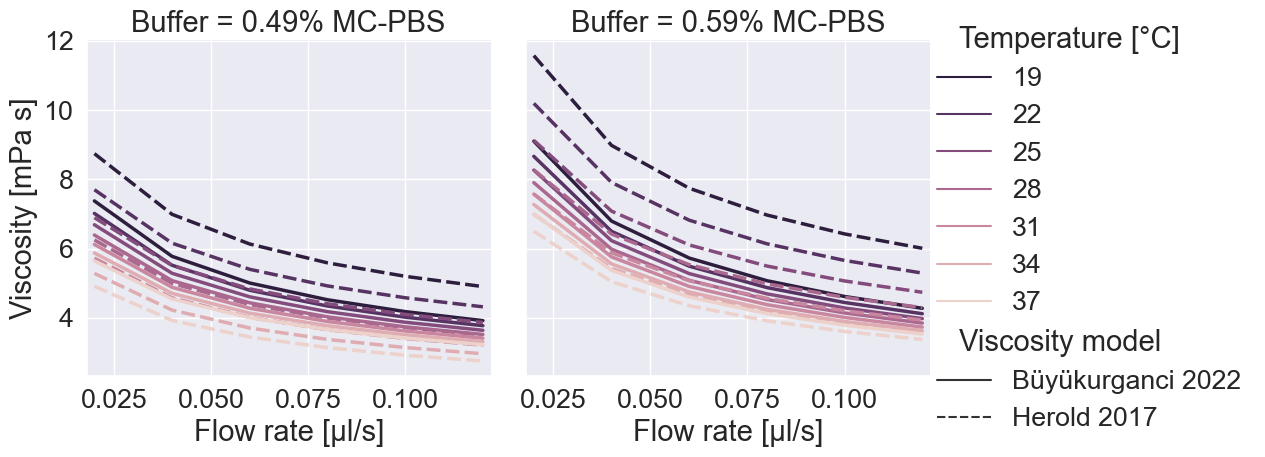

In [7]:
facet_kws = {'sharey': True, 'xlim': [0.018, 0.122]}
rl = sns.relplot(data=df_20um, x='Flow rate [µl/s]', y='Viscosity [mPa s]',
                 hue='Temperature [°C]', palette='ch:_r', style='Viscosity model',
                 col='Buffer',
                 kind='line', linewidth=2.5,
                 legend='full', facet_kws=facet_kws)
# plt.tight_layout()
savename = "plots//bb_vs_herold_20um_hue_temperature"
rl.savefig(savename+".pdf", bbox_inches='tight',dpi=900)
rl.savefig(savename+".png", bbox_inches='tight', dpi=900)
plt.show()

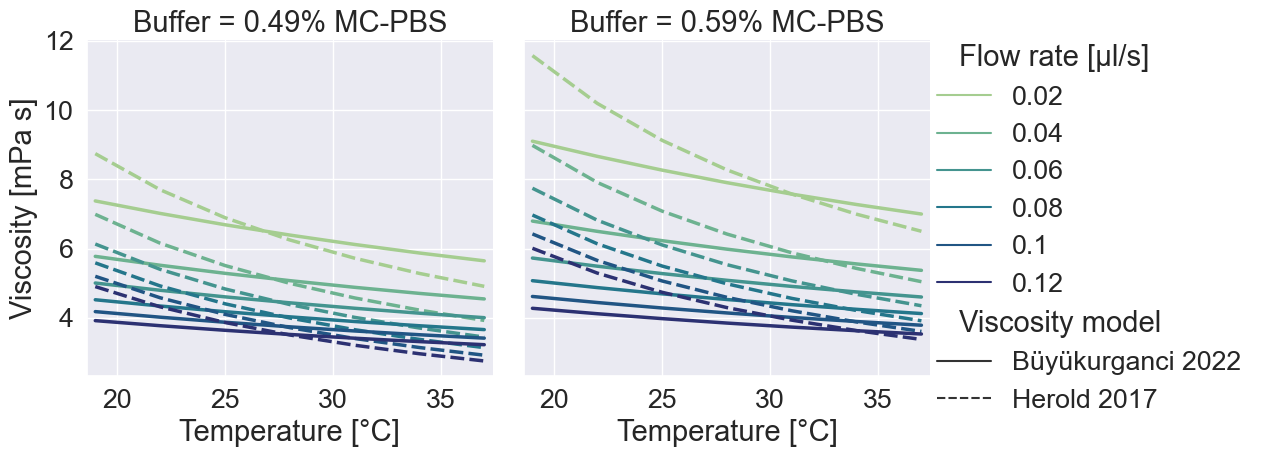

In [12]:
fct_kws = {#'ylim': [0, 12],
           'sharey': True,
           'xlim': [18.6, 37.4]
           }
rl = sns.relplot(data=df_20um, x='Temperature [°C]', y='Viscosity [mPa s]',
                 hue='Flow rate [µl/s]', palette='crest', style='Viscosity model',
                 col='Buffer',
                 kind='line', linewidth=2.5,
                 legend='full',
                 facet_kws=fct_kws
                 )
# plt.tight_layout()
savename = "plots//bb_vs_herold_20um_hue_flow_rate"
rl.savefig(savename+".pdf", bbox_inches='tight',dpi=900)
rl.savefig(savename+".png", bbox_inches='tight', dpi=900)
plt.show()

## 30 µm

In [9]:
channel_size = 30
flow_rates = np.round(np.linspace(0.08, 0.32, 7), 2)
temperatures = np.arange(19, 38, 3)

df_30um = get_dataframe(channel_size, flow_rates, temperatures)

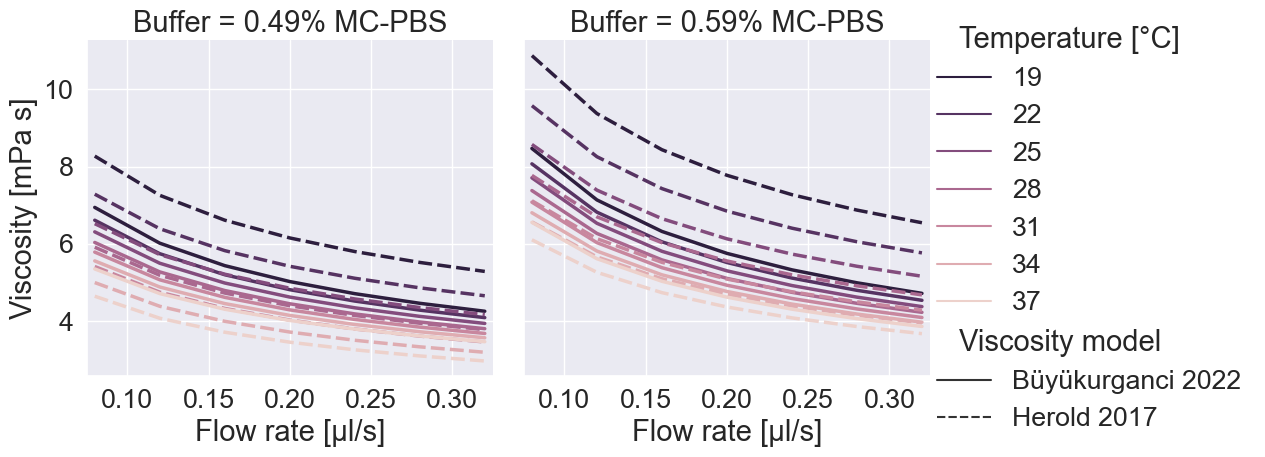

In [13]:
facet_kws = {'sharey': True, 'xlim': [0.075, 0.325]}
rl = sns.relplot(data=df_30um, x='Flow rate [µl/s]', y='Viscosity [mPa s]',
                 hue='Temperature [°C]', palette='ch:_r',
                 style='Viscosity model', #style_order=["Herold 2017", "Büyükurganci 2022"],
                 col='Buffer',
                 kind='line', linewidth=2.5,
                 legend='full',
                 facet_kws=facet_kws)
# plt.tight_layout()
savename = "plots//bb_vs_herold_30um_hue_temperature"
rl.savefig(savename+".pdf", bbox_inches='tight',dpi=900)
rl.savefig(savename+".png", bbox_inches='tight', dpi=900)
plt.show()

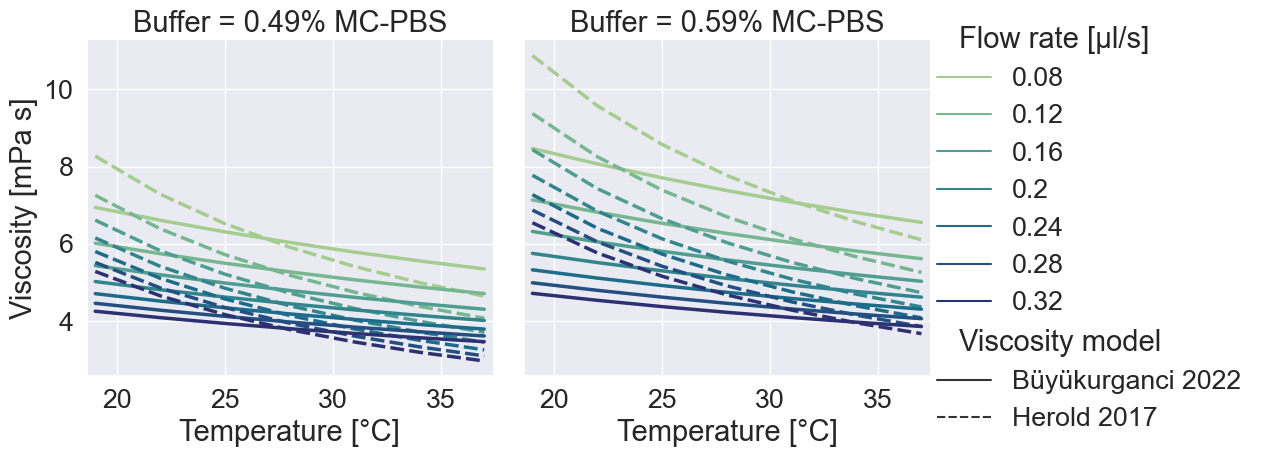

In [14]:
facet_kws = {'sharey': True, 'xlim': [18.6, 37.4]}
rl = sns.relplot(data=df_30um, x='Temperature [°C]', y='Viscosity [mPa s]',
                 hue='Flow rate [µl/s]', palette='crest', style='Viscosity model',
                 col='Buffer',
                 kind='line', linewidth=2.5,
                 legend='full',
                 facet_kws=facet_kws)
# plt.tight_layout()
savename = "plots//bb_vs_herold_30um_hue_flow_rate"
rl.savefig(savename+".pdf", bbox_inches='tight',dpi=900)
rl.savefig(savename+".png", bbox_inches='tight', dpi=900)
plt.show()